In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [93]:
data = pd.read_csv("./data/dataR2.csv")
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Text(0, 0.5, 'Leptin')

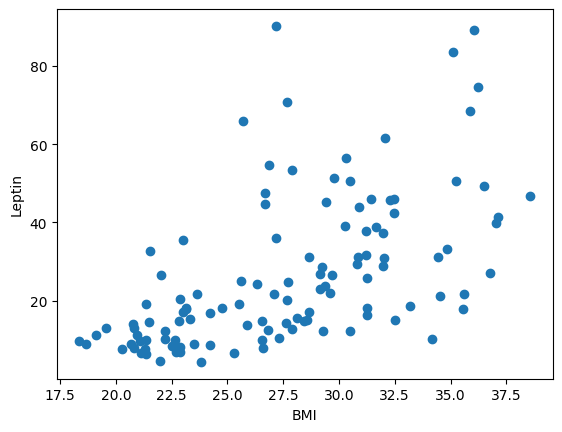

In [94]:
x = np.array(data["BMI"])
y = np.array(data["Leptin"])
plt.scatter(x,y)
plt.xlabel("BMI")
plt.ylabel("Leptin")

In [87]:
def compute_cost(x,y,w, b):
    f_wb = w * x + b

    m = len(x)
    cost = (f_wb - y) ** 2
    j_wb = (1/(2 * m)) * np.sum(cost)

    return j_wb

compute_cost(x,y,1,0)

140.99255598618413

In [88]:
def compute_gradient(x,y,w,b):
    m = len(x)
    f_wb = w * x + b
    dj_dw = (np.sum((f_wb - y) * x)) / m
    dj_db = (np.sum(f_wb - y)) / m
    # for i in range(m):
    #     f_wb = w * x[i] + b
    #     dj_dw_i = (f_wb - y[i]) * x[i]
    #     dj_db_i = (f_wb - y[i])
    #     dj_dw += dj_dw_i
    #     dj_db += dj_db_i
    # dj_dw = dj_dw / m
    # dj_db = dj_db / m

    return dj_dw, dj_db

In [177]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 1.02e+05  dj_dw: -1.761e+03, dj_db: -5.286e+01   w:  1.761e+01, b: 5.28610e-01
Iteration    1: Cost 5.60e+06  dj_dw:  1.308e+04, dj_db:  3.879e+02   w: -1.131e+02, b:-3.35012e+00
Iteration    2: Cost 3.09e+08  dj_dw: -9.710e+04, dj_db: -2.885e+03   w:  8.578e+02, b: 2.54990e+01
Iteration    3: Cost 1.70e+10  dj_dw:  7.210e+05, dj_db:  2.142e+04   w: -6.352e+03, b:-1.88683e+02
Iteration    4: Cost 9.39e+11  dj_dw: -5.354e+06, dj_db: -1.591e+05   w:  4.719e+04, b: 1.40183e+03
Iteration    5: Cost 5.18e+13  dj_dw:  3.976e+07, dj_db:  1.181e+06   w: -3.504e+05, b:-1.04090e+04
Iteration    6: Cost 2.85e+15  dj_dw: -2.952e+08, dj_db: -8.770e+06   w:  2.602e+06, b: 7.72956e+04
Iteration    7: Cost 1.57e+17  dj_dw:  2.192e+09, dj_db:  6.513e+07   w: -1.932e+07, b:-5.73980e+05
Iteration    8: Cost 8.68e+18  dj_dw: -1.628e+10, dj_db: -4.836e+08   w:  1.435e+08, b: 4.26226e+06
Iteration    9: Cost 4.79e+20  dj_dw:  1.209e+11, dj_db:  3.591e+09   w: -1.065e+09, b:-3.16506e+07


In [89]:
compute_gradient(x,y,1,0)

(-2.7232023141563437, 0.9670306548746449)

In [175]:
print(compute_cost(x,y,7.084e+70,2.10440e+69))
print(compute_cost(x,y,3.612e+79,1.07289e+78))

2.11602610664968e+144
5.501223952164761e+161


In [91]:
def compute_gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []

    alpha = alpha
    num_iters = 100
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    if i < 10000:
        J_history.append( compute_cost(x,y,w,b))
        p_history.append([w,b])
        
    return w, b, J_history, p_history

compute_gradient_descent()


(-4.7782632101317215e+83,
 -1.6773615071461948e+82,
 [8.992247777376406e+169],
 [[-4.7782632101317215e+83, -1.6773615071461948e+82]])

-4.7782632101317215e+83
-1.6773615071461948e+82


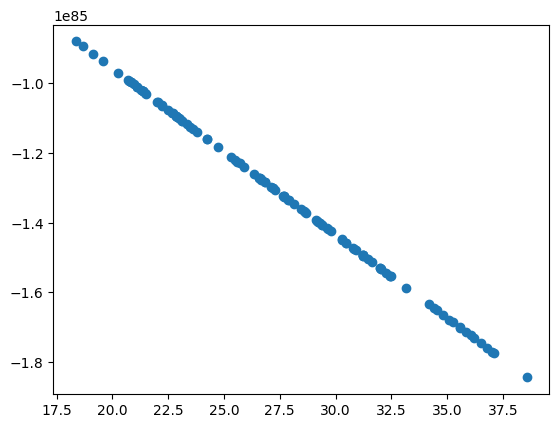

In [102]:
w,b,J_history, p_history = compute_gradient_descent()
print(w)
print(b)

y_hat = w * x + b
plt.scatter(x, y_hat)

In [168]:
x = np.linspace(0, 50, 50)
y = 2 * x + 1    
random_number = random.randint(1, 10)
noise = np.random.normal(0, 30, len(y)) 
y = y + noise

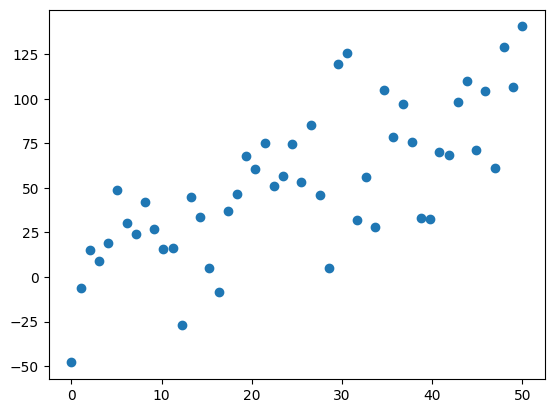

In [179]:
plt.scatter(x,y)

In [181]:
compute_gradient(x,y,0,0)

(-1760.8225292262857, -52.86100787748053)

In [188]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

print(x_train)
print(y_train)

[1. 2.]
[300. 500.]


In [189]:
compute_gradient(x_train,y_train,1,1)


(-646.0, -397.5)

In [190]:
(-646.0, -397.5)

(-646.0, -397.5)

In [191]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


In [ ]:
Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02
(w,b) found by gradient descent: (199.9929,100.0116)